KENDİ MODELİMİZ

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


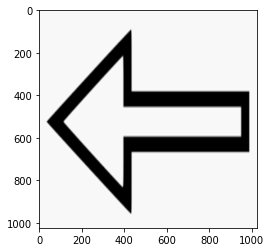

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/content/drive/MyDrive/TestData/train"
CATEGORIES = ["L", "R" , "U"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # path to right,up and left arrows dir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

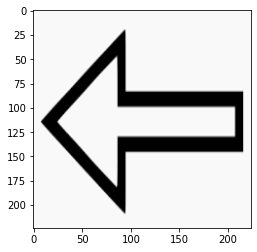

In [79]:
IMG_SIZE = 224
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [80]:
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [117]:
batch_size = 64
img_height = 224
img_width = 224

In [118]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1741 files belonging to 3 classes.
Using 1393 files for training.


In [119]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1741 files belonging to 3 classes.
Using 348 files for validation.


In [120]:
class_names = train_ds.class_names
print(class_names)

['L', 'R', 'U']


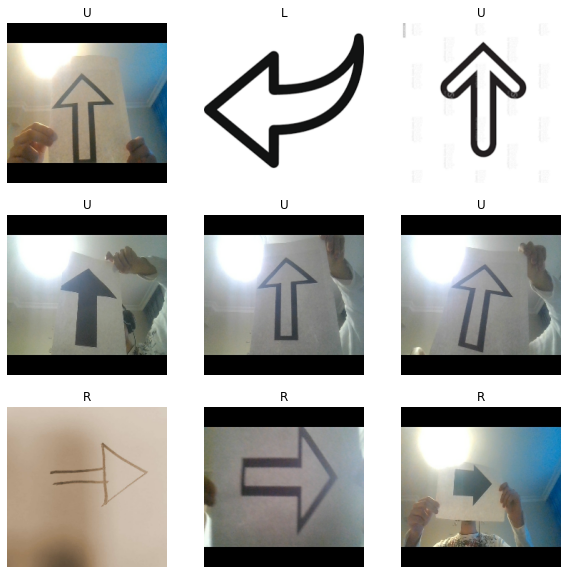

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [122]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [123]:
data_augmentation = keras.Sequential(
  [
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.01),
    layers.RandomZoom(0.1),
  ]
)

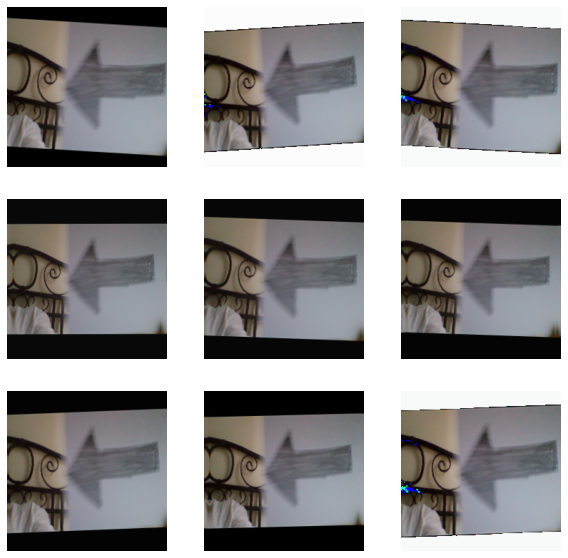

In [124]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [162]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation='softmax')
])

In [163]:
model.compile(optimizer='Adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [164]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_31 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_209 (Conv2D)         (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_209 (MaxPooli  (None, 112, 112, 16)     0         
 ng2D)                                                           
                                                                 
 conv2d_210 (Conv2D)         (None, 112, 112, 16)      2320      
                                                                 
 max_pooling2d_210 (MaxPooli  (None, 56, 56, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_211 (Conv2D)         (None, 56, 56, 32)      

30-40 epoch eğitimi

In [175]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
22/22 [==============================] - 68s 3s/step - loss: 0.0164 - accuracy: 0.9943 - val_loss: 0.2324 - val_accuracy: 0.9368
Epoch 2/10
22/22 [==============================] - 67s 3s/step - loss: 0.0153 - accuracy: 0.9971 - val_loss: 0.1849 - val_accuracy: 0.9684
Epoch 3/10
22/22 [==============================] - 67s 3s/step - loss: 0.0154 - accuracy: 0.9964 - val_loss: 0.1934 - val_accuracy: 0.9713
Epoch 4/10
22/22 [==============================] - 68s 3s/step - loss: 0.0113 - accuracy: 0.9986 - val_loss: 0.1890 - val_accuracy: 0.9684
Epoch 5/10
22/22 [==============================] - 74s 3s/step - loss: 0.0150 - accuracy: 0.9964 - val_loss: 0.2603 - val_accuracy: 0.9368
Epoch 6/10
22/22 [==============================] - 70s 3s/step - loss: 0.0175 - accuracy: 0.9935 - val_loss: 0.2297 - val_accuracy: 0.9598
Epoch 7/10
22/22 [==============================] - 69s 3s/step - loss: 0.0155 - accuracy: 0.9971 - val_loss: 0.1978 - val_accuracy: 0.9684
Epoch 8/10
22/22 [==

0-10 epoch grafiği

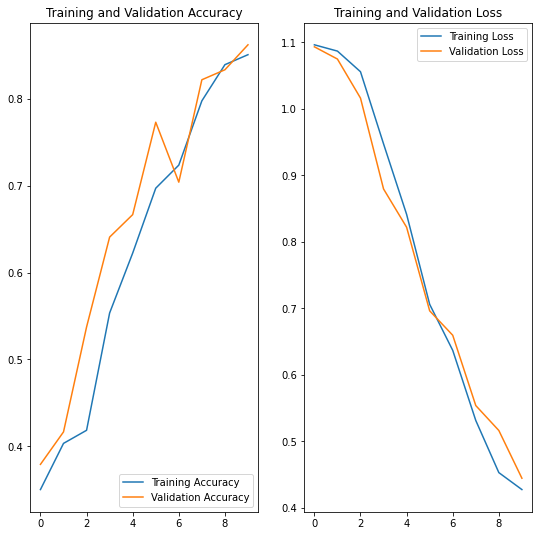

In [166]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

10-20 epoch 

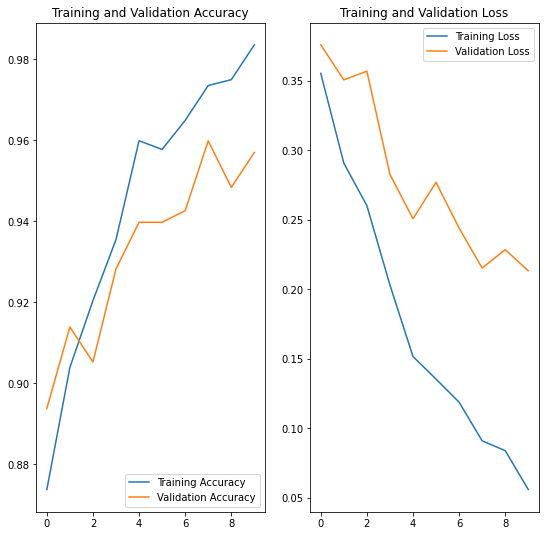

In [168]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

20-30 epoch 

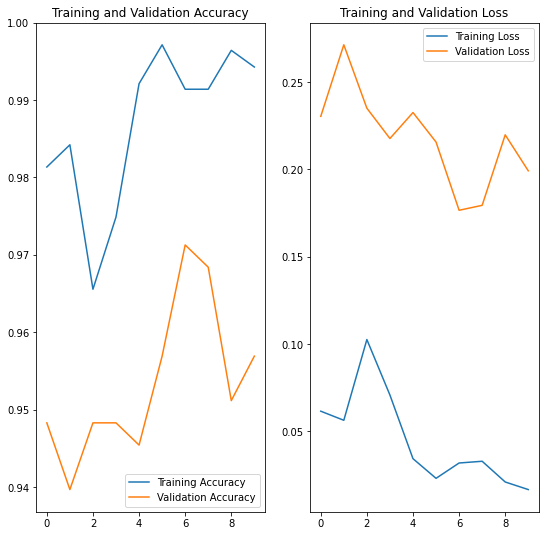

In [171]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(9, 9))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [176]:
model.save('/content/drive/MyDrive/TestData/emirhanV4')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TestData/emirhanV4/assets


In [10]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/TestData/emirhan')

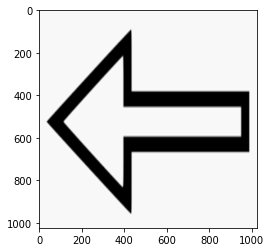

In [13]:
DATADIR2 = "/content/drive/MyDrive/TestData/test"
CATEGORIES = ["L", "R" , "U"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # path to right,up and left arrows dir
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

In [ ]:
print(img_array)

[[247 247 247 ... 247 247 247]
 [247 247 247 ... 247 247 247]
 [247 247 247 ... 247 247 247]
 ...
 [247 247 247 ... 247 247 247]
 [247 247 247 ... 247 247 247]
 [247 247 247 ... 247 247 247]]


In [1]:
def sıralama(n):
  if n==0:
    return "Sol"
  elif n==1:
    return "Sağ"
  elif n==2:
    return "Yuk"
  else:
    return "yok"

In [3]:
def array2dir(array):
    if array[0][0] > array[0][1] and array[0][0] > array[0][2]:
            return "Sol"

    if array[0][1] > array[0][0] and array[0][1] > array[0][2]:
            return "Sağ"

    if array[0][2] > array[0][1] and array[0][2] > array[0][0]:
            return "Yuk"

In [14]:
test_data=[]
IMG_SIZE=224
def create_test_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR2, category) # path to right,up and left arrows dir
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        test_data.append([new_array, class_num])
      except Exception as e:
        pass
create_test_data()
print(len(test_data))


31


Sol


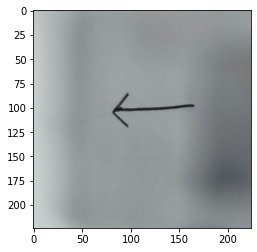

In [15]:
plt.imshow(test_data[9][0])
print(sıralama(test_data[9][1]))

In [16]:
import random
random.shuffle(test_data)

In [173]:
tr=0
fs=0
for data in test_data:
  image=np.array(data[0])
  image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
  tahmin = model.predict(image)
  print("tahmin: ",array2dir(tahmin), "\t cevap: ",sıralama(data[1]))
  
  if(array2dir(tahmin)==sıralama(data[1])):
    tr+=1
  else:
    fs+=1

print(tr*100/len(test_data)) 

tahmin:  Sol 	 cevap:  Sol
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Sol 	 cevap:  Sol
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Sol 	 cevap:  Sol
tahmin:  Sol 	 cevap:  Sol
tahmin:  Sol 	 cevap:  Sol
tahmin:  Sol 	 cevap:  Sol
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Sol 	 cevap:  Sol
tahmin:  Sol 	 cevap:  Sol
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Sol 	 cevap:  Sol
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Sol 	 cevap:  Sol
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Sağ 	 cevap:  Sağ
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Yuk 	 cevap:  Yuk
tahmin:  Sol 	 cevap:  Sağ
96.7741935483871


In [59]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


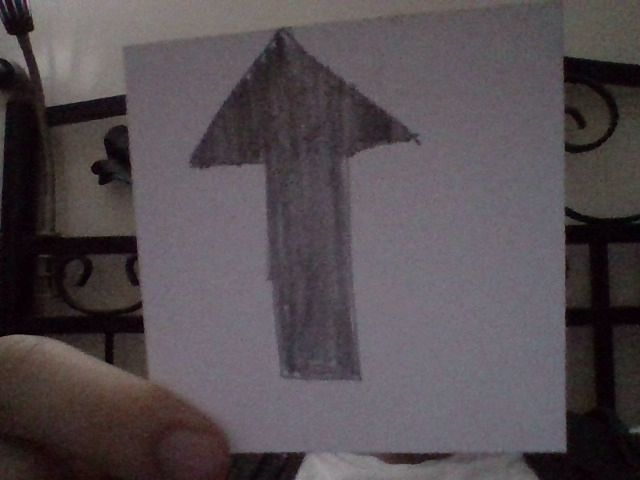

In [74]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<PIL.Image.Image image mode=LA size=224x224 at 0x7F4DB40D4610>


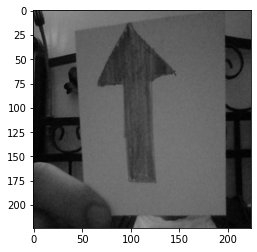

In [75]:
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2

img = Image.open(filename).convert('LA')
img = img.resize((224,224), Image.ANTIALIAS)


cv2.imread(os.path.join("/content","img"),cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
print(img)



In [174]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
image = load_img(("/content/photo.jpg"), target_size=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
#print(pathx)
x=model.predict(image)
print(array2dir(x))
print(x)
      

Yuk
[[0.0771218  0.23722725 0.685651  ]]
